# Titanic 데이터셋 소개

Titanic 데이터셋은 1912년 타이타닉호 침몰 사건 당시의 승객 정보와 생존 여부를 포함한 데이터셋으로, 생존 예측 모델을 훈련하는 데 자주 사용된다.

## 데이터셋의 구성

Titanic 데이터셋은 다음과 같은 주요 특징들을 포함합니다.

- **데이터 수**: 891개의 데이터 포인트(레코드)가 있다.
- **변수 수**: 총 12개의 변수(컬럼)가 포함되어 있다.

## 변수 설명

| 변수            | 설명                                                                 | 변수 유형             | 비고                            |
|-----------------|----------------------------------------------------------------------|-----------------------|---------------------------------|
| `Survived`      | 승객의 생존 여부를 나타낸다. 0은 사망, 1은 생존을 의미한다.         | 범주형 변수            | 예측 목표                       |
| `Pclass`        | 승객의 티켓 등급을 나타낸다. 1, 2, 3의 세 가지 등급이 있다.         | 범주형 변수            | 1: 1등석, 2: 2등석, 3: 3등석    |
| `Name`          | 승객의 이름을 나타낸다.                                             | 문자열 변수            | 이름 및 호칭 포함               |
| `Sex`           | 승객의 성별을 나타낸다.                                              | 범주형 변수            | 남성, 여성                      |
| `Age`           | 승객의 나이를 나타낸다.                                             | 연속형 변수            | 결측치 포함 가능                |
| `SibSp`         | 승선한 형제 또는 배우자의 수를 나타낸다.                             | 연속형 변수            | 정수 값으로 표현                |
| `Parch`         | 승선한 부모 또는 자녀의 수를 나타낸다.                               | 연속형 변수            | 정수 값으로 표현                |
| `Ticket`        | 티켓 번호를 나타낸다.                                                | 문자열 변수            | 고유한 티켓 번호                |
| `Fare`          | 티켓 요금을 나타낸다.                                               | 연속형 변수            | 실수 값으로 표현                |
| `Cabin`         | 선실 번호를 나타낸다.                                                | 문자열 변수            | 결측치 포함 가능                |
| `Embarked`      | 승선한 항구를 나타낸다. C: Cherbourg, Q: Queenstown, S: Southampton | 범주형 변수            | C, Q, S                         |


# Step 1 - 데이터 준비

우선 `seaborn` 라이브러리에서 제공하는 `titanic` 데이터셋을 가져온다.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Step 2 - 데이터 탐색
`info()` 메서드를 사용하여 데이터의 자료형과 개수를 확인한 결과, `age`, `embarked`, `deck` 등 일부 열에 누락데이터가 포함된 것을 확인할 수 있다. 데이터의 특성과 분석 목표에 맞춰 누락 데이터를 처리해야 한다.

In [72]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


`describe()` 메서드를 사용해서 데이터의 요약 정보를 확인한다. 중심 경향과 분산, 이상치 존재 여부 등을 염두에 두고 파악한다. 요금(`fare`) 열의 최대값이 512.3인데 평균이나 중앙값에 비해 매우 큰 값이므로 이상치 여부를 분석할 필요가 있다.

In [73]:
# 데이터 통계 요약정보 확인
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`describe()` 메서드로 데이터의 요약 통계를 확인할 때는 기본적으로 숫자형 데이터에 대해서만 처리한다. 범주형 또는 문자열 변수를 포함하고 싶은 경우에는 `include='object'` 매개변수를 설정해야 한다.

남성 승객이 577명으로 여성 승객보다 많고, 대부분 Southampton 도시에서 탑승하였다.

In [74]:
# 데이터 통계 요약정보 확인 (범주형)
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


누락 데이터의 수를 확인하면, 객실 데크 위치를 나타내는 `deck` 열에는 688개의 누락 데이터가 있다. 유효한 값은 203에 불과하다. `age` 열에는 177개의 누락 데이터가 있다. 결측치에 대한 처리가 필요하다.

In [75]:
# 누락 데이터 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

중복 행을 확인해보면 107개의 행이 중복되는 것으로 나타난다. 죽복 데이터를 제거할 필요가 있다.

In [76]:
# 중복 데이터 확인
df.duplicated().sum()

107

생존 여부(`survived`)를 분류하는 모델을 학습시키는 것을 목표로 하고  있기 때문에 목표 변수의 분포를 확인하는 과정이 중요하다. 생존 클래스(`1`)의 비율이 그렇지 못한 클래스(`0`)보다 상대적으로 낮은 편으로 확인된다.

In [77]:
# 목표변수 
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

목표 변수(`survived`)의 분포를 `Seaborn` 라이브러리의 `countplot()` 함수를 이용하여 막대 그래프로 시각화한다. 생존자 비율이 상대적으로 낮은 것을 확인할 수 있다.

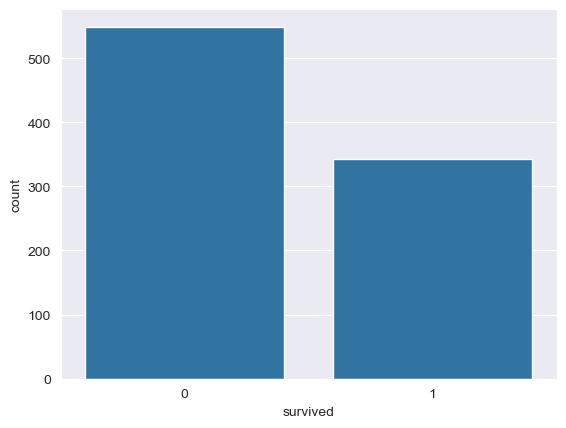

In [78]:
# 목표변수 - 시각화
sns.countplot(data=df, x='survived');

`Seaborn` 라이브러리의 `FacetGrid`를 사용하여 타이타닉 데이터셋의 여러 변수에 대한 조건부 분포를 시각화하여 분석한다.

승객의 탑승 클래스(`pclass`), 생존 여부(`survived`), 성별(`sex`)에 따른 나이(`age`) 분포를 시각화하여, 이러한 요소들이 생존율과 어떤 관계가 있는지 탐색한다. `map()` 메서드를 사용하여 각 서브플롯에 `age` 변수에 대한 커널 밀도 그래프를 그린다.

1등석 승객 중에서 사망한 경우에는 남성 승객의 연령대가 상대적으로 여성에 비해 높은 편이다. 그리고 2등석 생존자의 경우 여성 승객의 연령대가 남성보다 높은 경향이 있다.

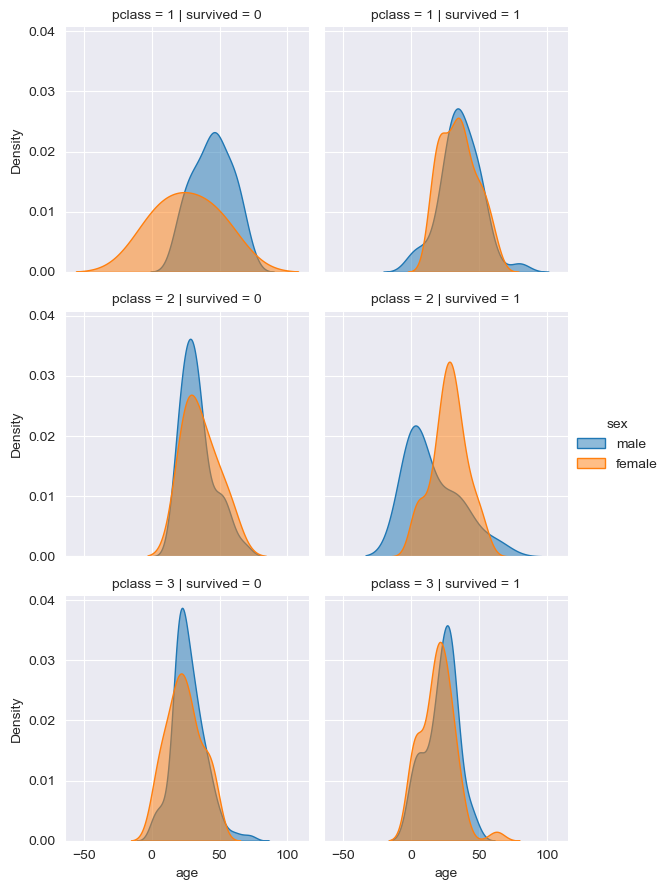

In [79]:
# 시각화 
g = sns.FacetGrid(df, col='survived', row='pclass', hue='sex')
g.map(sns.kdeplot, 'age', alpha=0.5, fill=True)
g.add_legend()

다음은 `Seaborn` 라이브러리의 `displot`을 사용하여, `sibsp` 변수(형제자매 및 배우자의 수)에 대한 히스토그램을 그리고, `survived` 변수에 따라 색상을 구분하여 시각화한다. 이 때 `multiple='fill'` 옵션을 사용하여 생존자와 미생존자의 비율을 상대적으로 표시한다.

형제자매 및 배우자의 수에 따른 생존율의 차이를 확인할 수 있다. 동승한 가족이 없거나 4명 이하일 경우에는 생존자가 있지만, 5명 이상일 경우에는 생존자가 없다. 형제자매 또는 배우자의 수가 1명이었을 경우에 생존율이 높은 편이다.

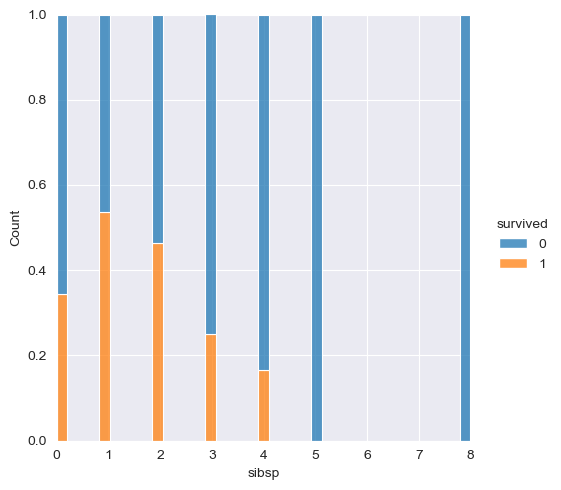

In [80]:
# 시각화 
sns.displot(x='sibsp', kind='hist', hue='survived', data=df, multiple='fill')

이번에는 `parch` 변수(부모 및 자식의 수)에 대한 히스토그램을 상대적 비율로 표시한다. 동승한 부모 및 자식의 수가 3명 이하일 경우에 생존율이 높은 것으로 파악된다.

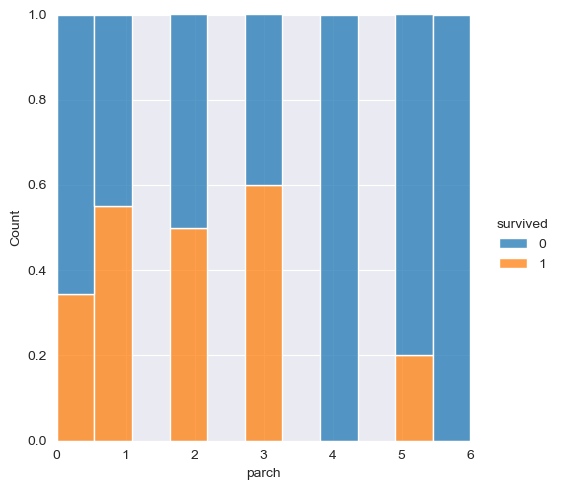

In [81]:
# 시각화 
sns.displot(x='parch', kind='hist', hue='survived', data=df, multiple='fill')

다음으로 `Seaborn` 라이브러리의 `boxplot`을 사용하여 `embarked`(탑승 항구), `age`(나이), `survived`(생존 여부) 변수 간의 관계를 박스 플롯으로 시각화한다.

박스 플롯은 데이터의 분포와 중앙값, 이상치를 시각적으로 표현하는 데 유용하다. x축에 탑승 항구별로 데이터를 분리하여 표기하고, y축에는 각 탑승 항구별 나이 분포를 나타낸다. 

`hue='survived'` 옵션에 따라 생존자와 미 생존자를 서로 다른 색상으로 구분한다. 이를 통해 탑승 항구별 생존 여부에 따른 나이 분포의 차이를 시각적으로 비교할 수 있다.

Q 항구에서 탑승한 생존자의 나이가 다른 항구에서 탑승한 승객들보다 어린 편으로 파악된다.

<Axes: xlabel='embarked', ylabel='age'>

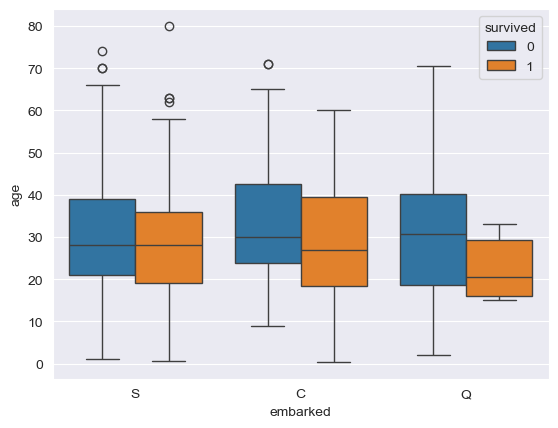

In [82]:
# 시각화 
sns.boxplot(x='embarked', y='age', hue='survived', data=df)

### Step 3 - 데이터 전처리

앞선 EDA에서 중복되는 행이 107개가 있다는 것을 확인하였다. `drop_duplicates()` 메서드를 사용하여 중복 데이터를 제거해 준다.

In [83]:
'''
[Step 3] 데이터 전처리
'''

# 중복 데이터 제거
print('중복 제거 이전: ', df.shape)
df = df.drop_duplicates()
print('중복 제거 이후: ', df.shape)

중복 제거 이전:  (891, 15)
중복 제거 이후:  (784, 15)


전체 891명의 승객 중에서 688명의 데이터가 존재하지 않는 `deck` 열을 제거해준다. 그리고 승선 도시를 나타내는 `embark_town` 열은 `embarked` 열과 사실상 동일한 의미를 가지기 때문에 중복을 없애는 차원에서 열 자체를 제거한다.

열 이름을 출력해 보면 `deck`, `embark_town` 열이 삭제된 것을 확인할 수 있다.

In [84]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype=object)

승객의 나이를 나타내는 `age` 열에 누락 데이터가 177개가 포함되어 있었다. 분석에 포함시켜야 하는 중요한 속성으로 판단될 경우 예측 결과에 영향을 최소화하는 방법을 선택해야 한다.

평균 나이로 치환하는 방법도 가능하지만, 누락 데이터가 있는 행을 모두 제거하기로 한다. 즉, 177명의 승객 데이터를 포기하고 나이 데이터가 있는 678명의 승객만을 분석 대상으로 한다.

(여기서 `age`에 누락 데이터가 있는 행을 삭제하는 방법은 부적절한 선택일 수도 있다. 이 방법뿐만 아니라 평균, 중앙값 등으로 누락 데이터를 치환하는 방법으로도 모델 학습을 진행하고 각 방법에 대한 모델의 성능을 비교해서 판단할 필요가 있다.)

In [85]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - NaN 값
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

678


`embarked` 열에는 승객들이 타이타닉호에 탑승한 도시명의 첫 글자가 들어 있다. 누락 데이터가 2개에 불과하므로, 가장 탑승한 승객이 많은 도시명으로 치환하기로 한다. 

`mode()` 메서드를 사용하여 최빈값을 구한다.

In [86]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].mode()[0]
print(most_freq)

S


앞서 구한 최빈값을 `embarked` 열에 `fillna()` 메서드의 인자로 인자로 전달한다. 결과적으로 누락 데이터를 `S` 값으로 치환한 배열을 원본 데이터에 업데이트한다. 결측치를 확인해보면 모든 열의 누락 데이터가 전부 제거 또는 대치된 것을 알 수 있다.

In [89]:
# 최빈값으로 누락 데이터 치환하기
rdf['embarked'] = rdf['embarked'].fillna(most_freq)

# 결측치 확인하기
rdf.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

# Step 4 - 변수 선택

변수로 사용할 후보 열을 선택해야 한다. 예측 변수로 생존 여부를 나타내는 `survived` 열을 추가하고 설명 변수로 사용할 후보 열을 6개 포함시킨다.

In [90]:
'''
[Step 4] 변수 선택
'''

# 분석에 활용할 열(특성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


KNN 모델을 적용하기 위해, `sex` 열과 `embarked` 열의 범주형 데이터를 숫자형으로 변환해야 한다. 이 과정을 더미 변수로 만든다고 하고, 원핫인코딩(one-hot-encoding)이라고도 한다.

`sex` 열에 `female`, `male` 값을 열 이름으로 갖는 2개의 더미 변수 열을 만들고, `embarked` 열은 3개의 더미 변수 열을 만든다. `prefix='town'` 옵션을 사용하여 열 이름에 접두어 `town`을 붙인다.

그리고 기존의 `sex`, `embarked` 열을 삭제해준다.

In [91]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf = ndf.drop(['sex', 'embarked'], axis=1)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,False,True,False,False,True
1,1,1,38.0,1,0,True,False,True,False,False
2,1,3,26.0,0,0,True,False,False,False,True
3,1,1,35.0,1,0,True,False,False,False,True
4,0,3,35.0,0,0,False,True,False,False,True


# Step 5 - 훈련/검증 데이터 분할

Step 4에서 정리한 열 중에서 예측 변수인 `survived` 열을 변수 `y`에 저장하고, 나머지 열들을 설명 변수로 사용하기 위해 변수 `X`에 저장한다.

설명 변수 열들이 갖는 데이터의 상대적 크기 차이를 없애기 위하여 정규화 과정을 거친다. `sklearn`의 `preprocessing` 모듈을 사용해서 정규화를 해준다.

그리고 `train_test_split()` 함수를 사용하여 훈련 데이터와 검증 데이터를 나눈다.(7:3)

In [93]:
'''
[Step 5] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
         'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y = ndf['survived']  #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (474, 9)
test data 개수:  (204, 9)


# Step 6 - 모델 학습 및 검증

`sklearn`의 `neighbors` 모듈의 `KNeighborsClassifier()` 함수로 KNN 분류 모형 객체를 생성하여 `knn`에 저장한다. `n_neighbors=5`와 같이 이웃의 숫자를 5개로 설정해준다.

훈련 데이터(`X_train`, `y_train`)를 `fit()` 메서드에 입력하여 모형을 학습시키고, 검증 데이터(`X_test`)를 `predict()` 메서드에 전달하여 모형이 분류한 예측값을 변수 `y_hat`에 저장한다.

예측값 `y_hat`을 실제값 `y_test`와 비교해보자.

In [94]:
'''
[Step 6] KNN 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 1 0 1 0 0 1 1 1 1]
[1 1 0 1 0 1 1 1 1 0]


모델의 예측능력을 평가해보자. `metrics` 모듈의 `confusion_matrix()` 함수를 사용하여 혼동 행렬(Confusion Matrix)을 계산한다. 이 함수는 [[`TN`, `FP`], [`FN`, `TP`]] 형태로 반환된다. 

따라서, 검증 데이터셋에 포함된 204명의 승객에 대해서 미생존자(`Negative`)를 정확히 예측한 `TN`은 99명, 미생존자(`Negative`)를 생존자로(`Positive`)로 잘못 분류한 `FP`는 24명, 생존자(`Positive`)를 미생존자(`Negative`)로 잘못 분류한 `FN`은 26명, 생존자(`Positive`)를 정확하게 예측한 `TP`는 55명으로 확인된다.

In [95]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics

knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

[[99 24]
 [26 55]]


혼동 행렬을 `heatmap()` 함수를 사용하여 히트맵으로 시각화한다.

Text(0.5, 38.31597222222221, 'Predicted label')

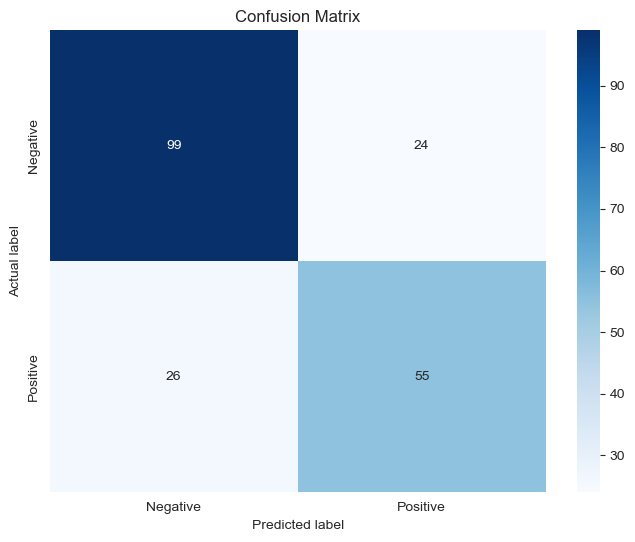

In [97]:
# Confusion Matrix 시각화

plt.figure(figsize=(8, 6))
sns.heatmap(knn_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

모델의 예측능력을 평가하는 여러 지표를 한번에 계산할 수도 있다. `metrics` 모듈의 `classification_report()` 함수를 사용하면 `accuracy`, `precision`, `recall`, `f1-score`, `support` 지표를 계산해준다.

`f1-score` 지표를 보면 미생존자(0:`Negative`) 예측의 경우 0.80이고, 생존자(1: `Positive`) 예측의 경우 0.69이다. 전체 모델 성능을 보면 정확도(`accuracy`)가 0.75로 확인된다. 종합적으로 볼 때, 생존자(1: `Positive`) 클래스에 대한 성능이 상대적으로 낮다. 모델 성능 개선이 필요하다고 판단된다.

In [99]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       123
           1       0.70      0.68      0.69        81

    accuracy                           0.75       204
   macro avg       0.74      0.74      0.74       204
weighted avg       0.75      0.75      0.75       204

